In [13]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 16

import dask.dataframe as dd
import pandas as pd
import numpy as np
import time

import plotly.io as pio
pio.renderers.default = 'notebook'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from dope.pools.pools import Pool
from dope.backengine.maestro import BackEngineMaestro

In [195]:
maestro = BackEngineMaestro()
pools = [
  ## vvvvvvvvvv
  # Base
  
  # Base - Moonwell
  Pool(
    chain="Base",
    symbol="wstETH-ETH",
    protocol="Moonwell",

    ltv=0.81,
    LT=0.81,
    deposit_token="wstETH",
    deposit_token_keyid="wrapped-steth",
    deposit_pool_id="0d27f0a5-572a-41cd-98a6-ad5804f95044",
    
    debt_token="ETH",
    debt_token_keyid="ethereum",
    debt_pool_id="914284ae-dbef-421f-bbb7-7c42f527fd5f",
  ),

]

In [295]:
# Download price data
maestro = BackEngineMaestro()
maestro.load_price_data(pools)

Data for ethereum with 366 rows
Data for wrapped-steth with 366 rows


<Axes: xlabel='date'>

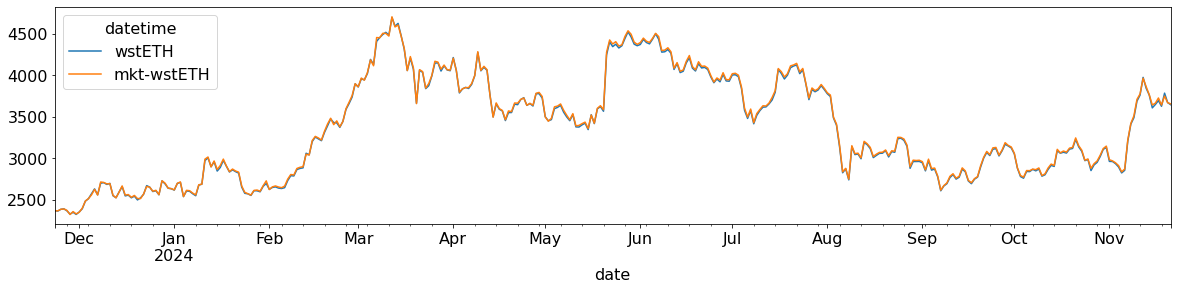

In [312]:
maestro.price_data_collection.as_block().price[["wstETH", "mkt-wstETH"]].plot()

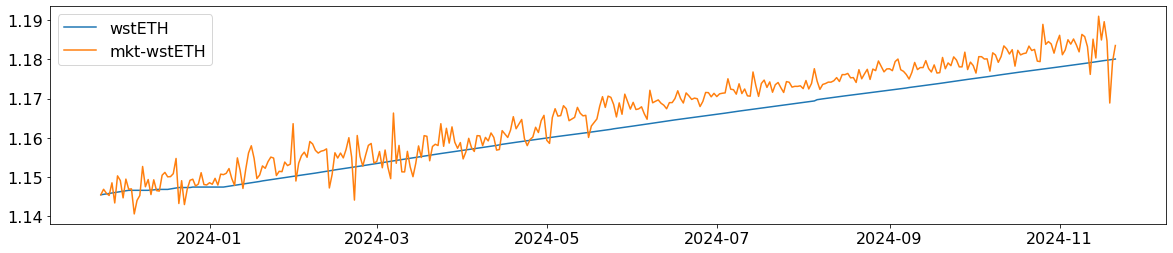

In [308]:
plt.plot(
  maestro.price_data_collection.as_block().price["wstETH"]
  / maestro.price_data_collection.as_block().price["ETH"]
  , label="wstETH"
)
plt.plot(
  maestro.price_data_collection.as_block().price["mkt-wstETH"]
  / maestro.price_data_collection.as_block().price["ETH"]
  , label="mkt-wstETH"
)
plt.legend()